# Orbit games

We consider energy plots and orbital solutions in polar coordinates for the general potential energy

$\begin{align}
   U(r) = k r^n
\end{align}$

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from scipy import integrate
from pylab import * # for plotting commands

In [2]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [3]:
class Orbit:
    """
    Potentials and associated differential equations for central force motion
    with the potential U(r) = k r^n.
    """
    
    def __init__(self, ang_mom, n, k=1, mu=1):
        self.ang_mom = ang_mom
        self.n = n
        self.k = k
        self.mu = mu
    
    def U(self, r):
        """Potential energy of the form U = kr^n."""
        return self.k * r**self.n
    
    def Ucf(self, r):
        """Centrifugal potential energy"""
        return self.ang_mom**2 / (2. * self.mu * r**2)
    
    def Ueff(self, r):
        """Effective potential energy"""
        return self.U(r) + self.Ucf(r)
    
    def U_deriv(self, r):
        """dU/dr"""
        return self.n * self.k * r**(self.n - 1)
        
    def Ucf_deriv(self, r):
        """dU_cf/dr"""
        return -2. * self.ang_mom**2 / (2. * self.mu * r**3)
        
    def Ueff_deriv(self, r):
        """dU_eff/dr"""
        return self.U_deriv(r) + self.Ucf_deriv(r)
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dr/dt d^2r/dt^2 dphi/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            3-component vector with y[0] = r(t), y[1] = dr/dt, y[2] = dphi/dt
            
        """
        return [ y[1], 
                -1./self.mu * self.Ueff_deriv(y[0]), 
                self.ang_mom / (self.mu * y[0]**2) ]
    
    
    def solve_ode(self, t_pts, r_0, r_dot_0, phi_0, 
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [r_0, r_dot_0, phi_0]  
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        r, r_dot, phi = solution.y
        return r, r_dot, phi
    
    def energy(self, t_pts, r, r_dot):
        """Evaluate the energy as a function of time"""
        return (self.mu/2.) * r_dot**2 + self.Ueff(r)

In [4]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

# Gravity: $n = -1$

In [17]:
def Ueff(r,k=1.):
    return -(2./3.)*r**(-3/2)+1./(2*r**2)

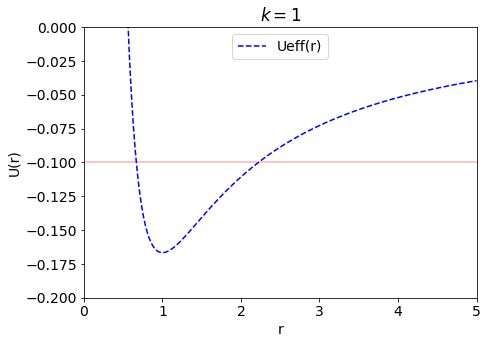

In [26]:
k=1
r_pts = np.linspace(0.001, 5., 200)

U_pts = Ueff(r=r_pts,k=k)

fig_2 = plt.figure(figsize=(7,5))
ax_2 = fig_2.add_subplot(1,1,1)
ax_2.plot(r_pts, U_pts, linestyle='dashed', color='blue', label='Ueff(r)')

ax_2.set_xlim(0., 5.)
ax_2.set_ylim(-.2, .0)
ax_2.set_xlabel('r')
ax_2.set_ylabel('U(r)')
ax_2.set_title(f'$k = {k}$')
ax_2.legend(loc='upper center')

ax_2.axhline(-0.1, color='red', alpha=0.3)

fig_2.tight_layout()

fig_2.savefig('Taylor_8_25a.png')


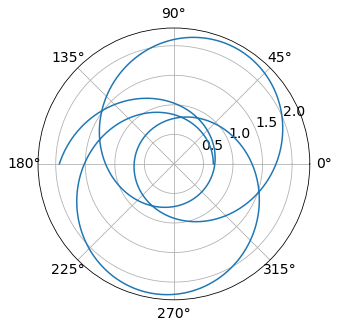

In [34]:
def rlc(A,t):
    u,w=A
    res=array([w,-u+u**(1./2.)])
    return res
    
phi = linspace(0.0,7.*np.pi,10001)
phi0=0.
u,w = integrate.odeint(rlc,[1./0.667079,0],phi).T

#plt.figure(1)
#plt.plot(phi,u,'b-',linewidth=2,label='u_NUM')
#plt.xlabel('phi')
#plt.ylabel('u')
#plt.legend()

fig_3 = plt.figure(figsize=(7,5))
ax_3 = fig_3.add_subplot(1,1,1,projection='polar')

ax_3.plot(phi, 1./u)
plt.show()

fig_3.savefig('Taylor_8_25c.png',bbox_inches='tight')

## Orbit (time dependence)

We'll directly solve the equations for r(t) and phi(t).

In [7]:
# Plotting time 
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions
r_0 = 0.2
r_dot_0 = 0.
phi_0 = 0.0
r_pts, r_dot_pts, phi_pts = o1.solve_ode(t_pts, r_0, r_dot_0, phi_0)

c = o1.ang_mom**2 / (np.abs(o1.k) * o1.mu)
epsilon = c / r_0 - 1.
energy_0 = o1.mu/2. * r_dot_0**2 + o1.Ueff(r_0)
print(f'energy = {energy_0:.2f}')
print(f'eccentricity = {epsilon:.2f}')

energy = -2.50
eccentricity = 0.67


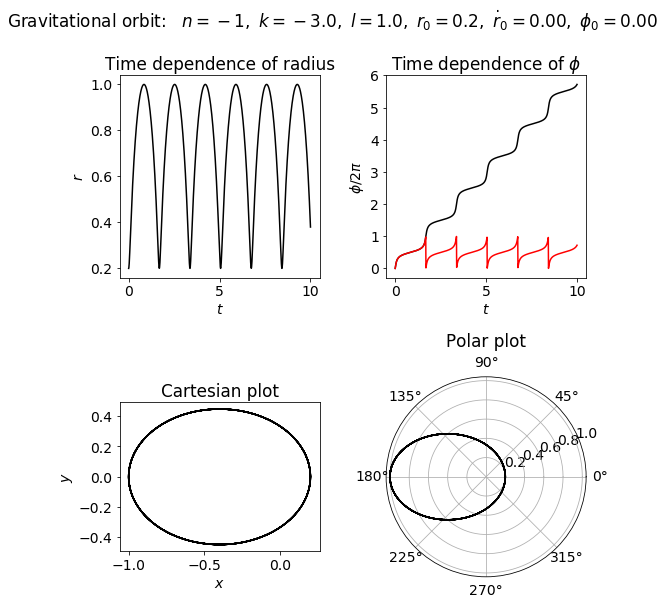

In [8]:
fig_4 = plt.figure(figsize=(8,8))

overall_title = 'Gravitational orbit:  ' + \
                rf' $n = {o1.n},$' + \
                rf' $k = {o1.k:.1f},$' + \
                rf' $l = {o1.ang_mom:.1f},$' + \
                rf' $r_0 = {r_0:.1f},$' + \
                rf' $\dot r_0 = {r_dot_0:.2f},$' + \
                rf' $\phi_0 = {phi_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_4.suptitle(overall_title, va='baseline')

ax_4a = fig_4.add_subplot(2,2,1)
ax_4a.plot(t_pts, r_pts, color='black')
ax_4a.set_xlabel(r'$t$')
ax_4a.set_ylabel(r'$r$')
ax_4a.set_title('Time dependence of radius')

ax_4b = fig_4.add_subplot(2,2,2)
ax_4b.plot(t_pts, phi_pts/(2.*np.pi), color='black')
ax_4b.plot(t_pts, phi_pts/(2.*np.pi)%1, color='red')
ax_4b.set_xlabel(r'$t$')
ax_4b.set_ylabel(r'$\phi/2\pi$')
ax_4b.set_title(r'Time dependence of $\phi$')

ax_4c = fig_4.add_subplot(2,2,3)
ax_4c.plot(r_pts*np.cos(phi_pts), r_pts*np.sin(phi_pts), color='black')
ax_4c.set_xlabel(r'$x$')
ax_4c.set_ylabel(r'$y$')
ax_4c.set_aspect(1)
ax_4c.set_title('Cartesian plot')

ax_4d = fig_4.add_subplot(2,2,4, polar=True)
ax_4d.plot(phi_pts, r_pts, color='black')
ax_4d.set_title('Polar plot', pad=20.)


fig_4.tight_layout()



## Energy versus time

In [9]:
E_tot_pts = o1.energy(t_pts, r_pts, r_dot_pts)
E_tot_0 = E_tot_pts[0]
E_tot_rel_pts = np.abs((E_tot_pts - E_tot_0)/E_tot_0)

print(f'    t        E_tot        rel. error')
for t, E_tot, E_tot_rel in zip(t_pts, E_tot_pts, E_tot_rel_pts):
    print(f'{t:8.5f}  {E_tot:8.5e}  {E_tot_rel:12.4e}')

    t        E_tot        rel. error
 0.00000  -2.50000e+00    0.0000e+00
 0.01000  -2.50000e+00    4.6955e-10
 0.02000  -2.50000e+00    2.2597e-09
 0.03000  -2.50000e+00    6.9594e-09
 0.04000  -2.50000e+00    1.3242e-09
 0.05000  -2.50000e+00    4.1569e-09
 0.06000  -2.50000e+00    4.9614e-09
 0.07000  -2.50000e+00    1.0533e-08
 0.08000  -2.50000e+00    4.6204e-09
 0.09000  -2.50000e+00    1.1301e-08
 0.10000  -2.50000e+00    1.7144e-08
 0.11000  -2.50000e+00    4.8229e-08
 0.12000  -2.50000e+00    3.4904e-08
 0.13000  -2.50000e+00    7.4317e-08
 0.14000  -2.50000e+00    1.4561e-07
 0.15000  -2.50000e+00    4.4071e-08
 0.16000  -2.50000e+00    1.0462e-07
 0.17000  -2.50000e+00    4.3664e-08
 0.18000  -2.50000e+00    8.2761e-08
 0.19000  -2.50000e+00    4.7845e-08
 0.20000  -2.50000e+00    6.0904e-08
 0.21000  -2.50000e+00    2.7102e-08
 0.22000  -2.50000e+00    8.1187e-09
 0.23000  -2.50000e+00    3.3880e-08
 0.24000  -2.50000e+00    2.2213e-08
 0.25000  -2.50000e+00    2.5017e-08
 

 9.31000  -2.50000e+00    1.3995e-07
 9.32000  -2.50000e+00    1.3996e-07
 9.33000  -2.50000e+00    1.3966e-07
 9.34000  -2.50000e+00    1.3933e-07
 9.35000  -2.50000e+00    1.3926e-07
 9.36000  -2.50000e+00    1.3950e-07
 9.37000  -2.50000e+00    1.3983e-07
 9.38000  -2.50000e+00    1.3989e-07
 9.39000  -2.50000e+00    1.3955e-07
 9.40000  -2.50000e+00    1.3910e-07
 9.41000  -2.50000e+00    1.3895e-07
 9.42000  -2.50000e+00    1.3931e-07
 9.43000  -2.50000e+00    1.3983e-07
 9.44000  -2.50000e+00    1.3989e-07
 9.45000  -2.50000e+00    1.3938e-07
 9.46000  -2.50000e+00    1.3878e-07
 9.47000  -2.50000e+00    1.3860e-07
 9.48000  -2.50000e+00    1.3913e-07
 9.49000  -2.50000e+00    1.4012e-07
 9.50000  -2.50000e+00    1.4022e-07
 9.51000  -2.50000e+00    1.3930e-07
 9.52000  -2.50000e+00    1.3826e-07
 9.53000  -2.50000e+00    1.3804e-07
 9.54000  -2.50000e+00    1.3861e-07
 9.55000  -2.50000e+00    1.4052e-07
 9.56000  -2.50000e+00    1.4110e-07
 9.57000  -2.50000e+00    1.3966e-07
 

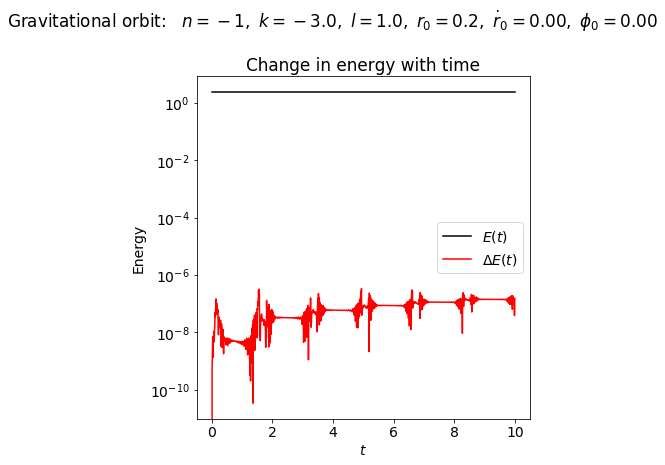

In [10]:
fig_5 = plt.figure(figsize=(6,6))

overall_title = 'Gravitational orbit:  ' + \
                rf' $n = {o1.n},$' + \
                rf' $k = {o1.k:.1f},$' + \
                rf' $l = {o1.ang_mom:.1f},$' + \
                rf' $r_0 = {r_0:.1f},$' + \
                rf' $\dot r_0 = {r_dot_0:.2f},$' + \
                rf' $\phi_0 = {phi_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_5.suptitle(overall_title, va='baseline')

ax_5a = fig_5.add_subplot(1,1,1)
ax_5a.semilogy(t_pts, np.abs(E_tot_pts), color='black', label=r'$E(t)$')
ax_5a.semilogy(t_pts, E_tot_rel_pts, color='red', label=r'$\Delta E(t)$')
ax_5a.set_xlabel(r'$t$')
ax_5a.set_ylabel(r'Energy')
ax_5a.set_title('Change in energy with time')
ax_5a.legend(loc='center right')

fig_5.tight_layout()

In [14]:
t_range=t_pts[-1]-t_pts[0]

U_pts=o1.U(r_pts)
T_pts=o1.energy(t_pts, r_pts, 0) - U_pts



In [75]:
from scipy.integrate import simps
t_start = 0.
t_end = [10., 100., 1000.]
delta_t = 0.1

t_pts = np.arange(t_start, t_end[2] + delta_t, delta_t)  
t_range=t_pts[-1]-t_pts[0]
    
print(rf't={t_range:.2f}',o1.n)
r_pts, r_dot_pts, phi_pts = o1.solve_ode(t_pts, r_0, r_dot_0, phi_0)

U_pts=o1.U(r_pts)
T_pts=o1.energy(t_pts, r_pts, 0) - U_pts

T_avg = simps(T_pts,t_pts,delta_t)/t_range
U_avg = simps(U_pts,t_pts,delta_t)/t_range

diff = np.abs(T_avg - o1.n*U_avg/2)
print(diff)

t=1000.00 -1.0
0.0004457883735406724
